# Titanic EDA



**AIM:**

*Delve into the Titanic dataset, examining socio-demographic factors like age, class,
and family size to understand their impact on survival rates. Through EDA, this project aims to uncover
patterns that reveal the underlying factors contributing to passenger survival. The goal is to provide a
nuanced view of how different attributes influenced outcomes, offering insights into the historical event's
human aspect.*

## Importing Libraries and Loading Dataset

In [15]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
#loading dataset using seaborn library
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Cleaning Dataset

In [3]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
# Fill missing values for 'age' with the median (or mean, depending on your choice)
df['age'].fillna(df['age'].median(), inplace=True)

# Fill missing values for 'embarked' with the most frequent value (mode)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Fill missing values for 'embark_town' with the most frequent value (mode)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

# Drop rows with missing values in the 'deck' column
df.dropna(subset=['deck'], inplace=True)

#verifying the dataset has been updated
print(df[['age', 'embarked', 'embark_town', 'deck']].isnull().sum())

age            0
embarked       0
embark_town    0
deck           0
dtype: int64


## Data Visualization





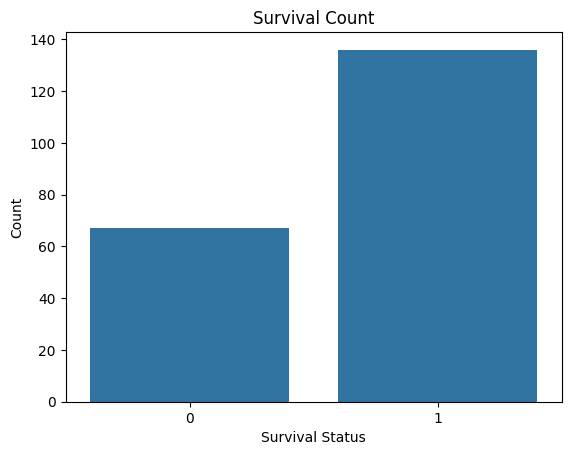

In [10]:
# Bar plot
sns.countplot(x='survived', data=df)
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Survival Count')
plt.show()

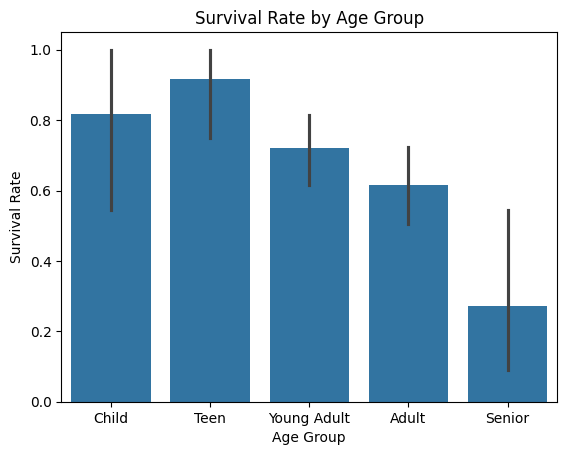

In [11]:
#identifying age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

#plotting survival rate by age_group
sns.barplot(x='age_group', y='survived', data=df)
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group')
plt.show()

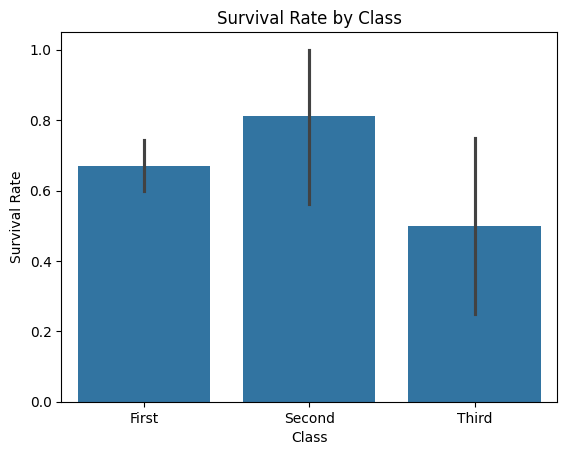

In [13]:
# survival rate by class
sns.barplot(x='class', y='survived', data=df)
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Class')
plt.show()

Text(0, 0.5, 'Survival Rate')

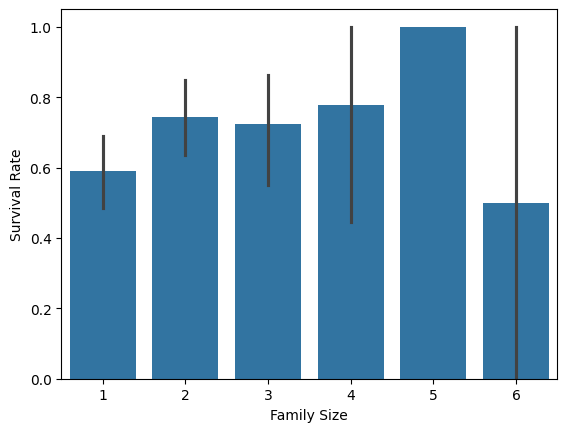

In [14]:
#survival rate by family size
df['family_size'] = df['sibsp'] + df['parch'] + 1
sns.barplot(x='family_size', y='survived', data=df)
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')

## Statistical Analysis

**Using the chi-square test:**

The chi-square test is a statistical tool used to check if two categorical variables are related or independent

the metric:



1.   chi-square: explains the dependency frequency between the variables
2.   p shows the probability of observing the chi-square



In [16]:
# Create a contingency table
age_group_survival = pd.crosstab(df['age_group'], df['survived'])

# Perform chi-square test
chi2, p, dof, ex = chi2_contingency(age_group_survival)
print(f'Chi-square test for Age Group and Survival: chi2={chi2}, p={p}')


Chi-square test for Age Group and Survival: chi2=14.412634463285672, p=0.006088138068588313


In [17]:
# Create a contingency table
class_survival = pd.crosstab(df['pclass'], df['survived'])

# Perform chi-square test
chi2, p, dof, ex = chi2_contingency(class_survival)
print(f'Chi-square test for Class and Survival: chi2={chi2}, p={p}')


Chi-square test for Class and Survival: chi2=3.0393747256365238, p=0.2187802751099475


In [18]:
# Create a contingency table
class_survival = pd.crosstab(df['family_size'], df['survived'])

# Perform chi-square test
chi2, p, dof, ex = chi2_contingency(class_survival)
print(f'Chi-square test for Class and Survival: chi2={chi2}, p={p}')


Chi-square test for Class and Survival: chi2=6.529175770992659, p=0.2580752235188322


The following analysis shows that family size,class,age group had a significant impact upon the survival of the passengers in the tragic incident of Titanic